* You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:

  > 1. **Pregnancies:** Number of times pregnant (integer)<br>
  > 2. **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)<br>
  > 3. **BloodPressure:** Diastolic blood pressure (mm Hg) (integer)<br>
  > 4. **SkinThickness:** Triceps skin fold thickness (mm) (integer)<br>
  > 5. **Insulin:** 2-Hour serum insulin (mu U/ml) (integer)<br>
  > 6. **BMI:** Body mass index (weight in kg/(height in m)^2) (float)<br>
  > 7. **DiabetesPedigreeFunction**: Diabetes pedigree function (a function which scores likelihood of diabetes<br>

* based on family history) (float) 8. Age: Age in years (integer) 9. Outcome:    Class variable (0 if non-diabetic, 1 if diabetic) (integer)

* Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. Here are the steps you can follow:

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### `Q1`. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.


In [25]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [29]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: >

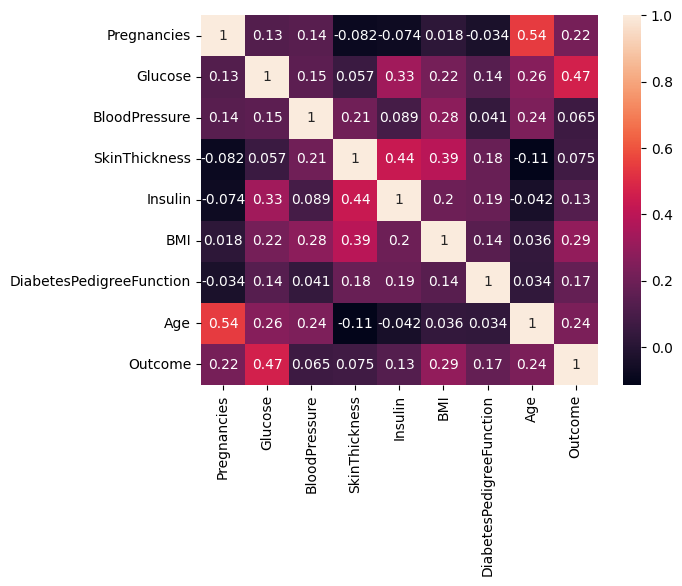

In [30]:
sns.heatmap(df.corr(), annot=True)

Observations:
* All of the columns are numerical
* There are no null values in any column, that means the data is complete and   there's no need to perform any imputation techniques.
* Looking at the common statistics about the data, the maximum number of  pregnencies for a patient is 17 which looks like it can be an outlier.
* The dataset is imbalanced. Class 0 has almost double the amount of records than class 1. The performance of the model is expected to be biased towards class 0.

#### `Q2`. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.


<Axes: >

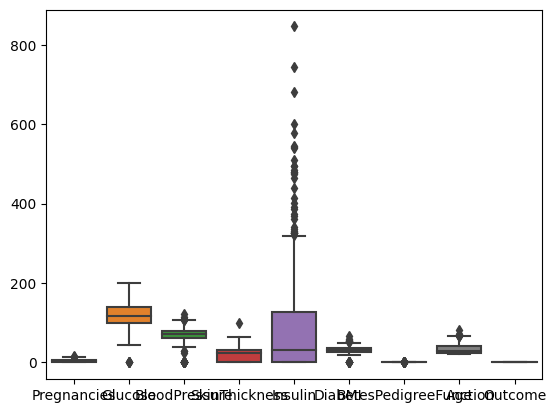

In [31]:
sns.boxplot(df)

<Axes: ylabel='Count'>

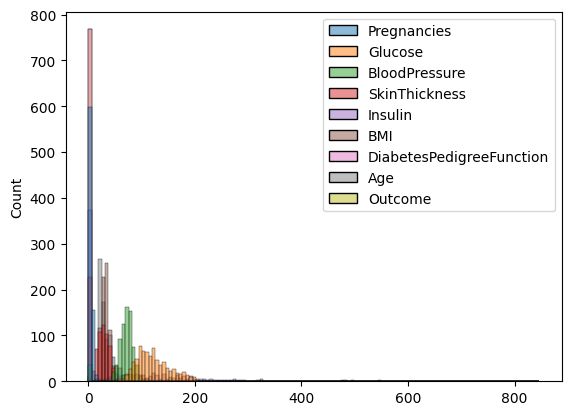

In [32]:
sns.histplot(df)

#### `Q3`. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.


In [33]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


#### `Q4`. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

clf = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [36]:
grid_search.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2'}

In [37]:
clf = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=9,max_features='auto', random_state=1024)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

#### `Q5`. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.


In [38]:
from sklearn.metrics import classification_report

target_names=['Non_diabetic', 'Diabetic']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Non_diabetic       0.75      0.80      0.78        50
    Diabetic       0.58      0.52      0.55        27

    accuracy                           0.70        77
   macro avg       0.67      0.66      0.66        77
weighted avg       0.69      0.70      0.70        77



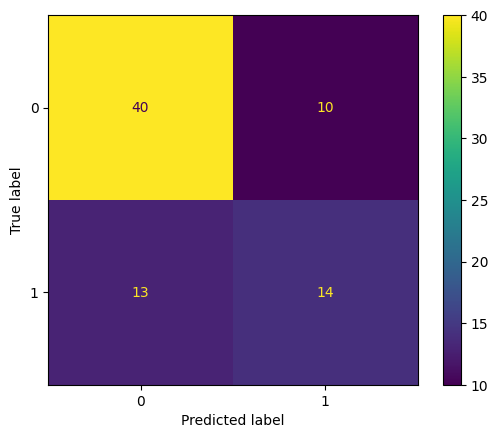

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

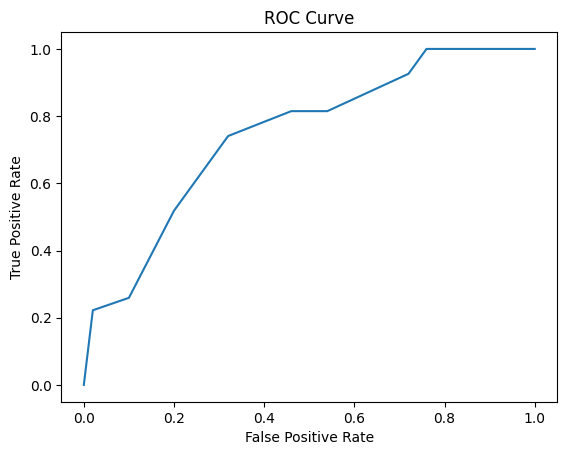

In [40]:
#ROC curve
from sklearn.metrics import roc_curve

y_proba = clf.predict_proba(x_test)[:, 1]  #use the probability of the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

#plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### `Q6`. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.


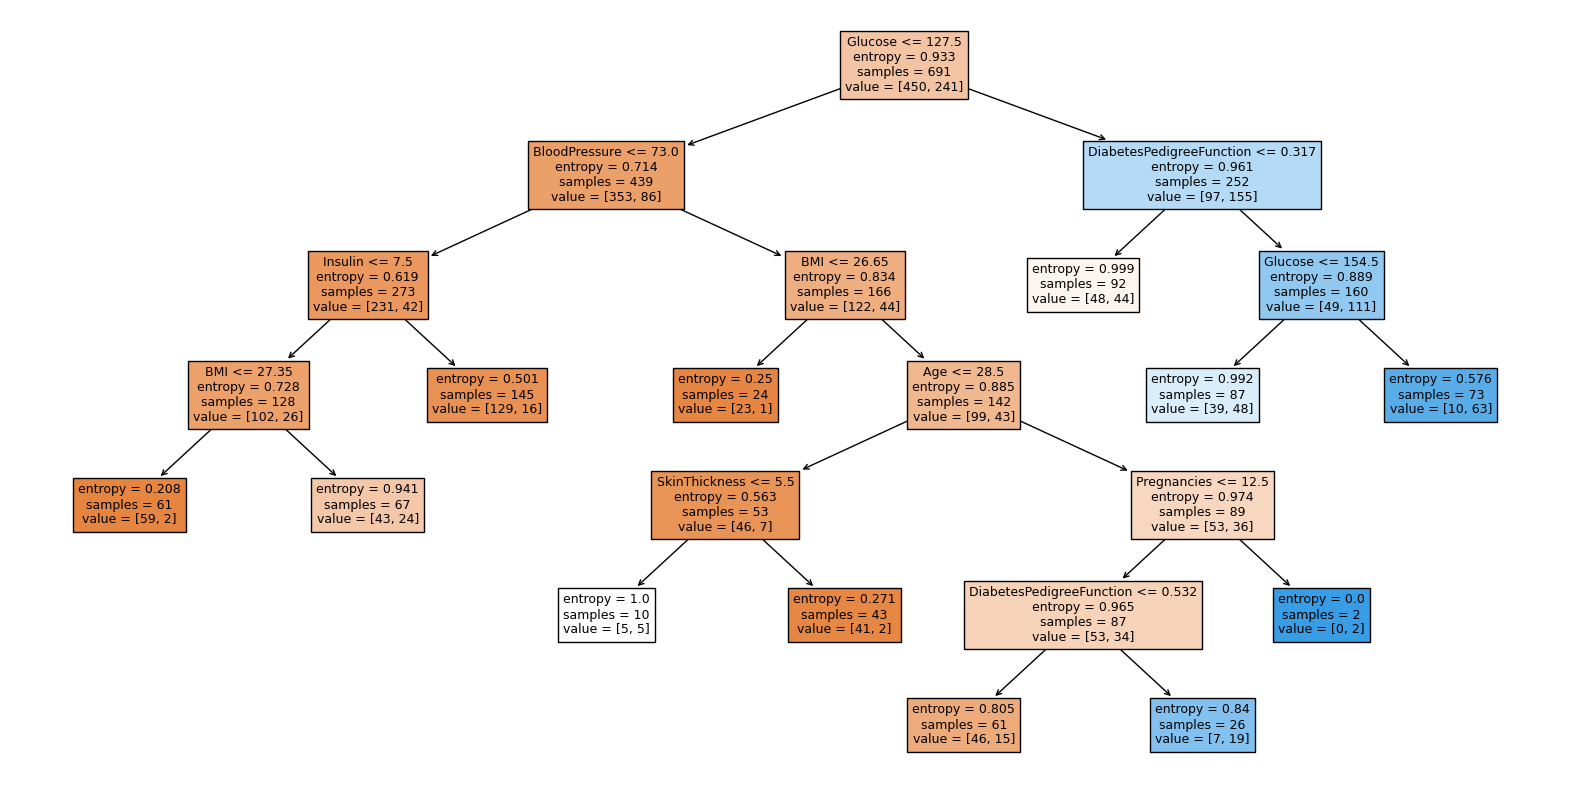

In [41]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=x_train.columns)
plt.show()

In [42]:
importance_scores = clf.feature_importances_
#get the indices of the top 3 most important features
most_important_indices = np.argsort(importance_scores)[::-1][:3] # where n is the number of most important features

#get the names of the most important features
most_important_features = x_train.columns[most_important_indices]

for feature in most_important_features:
    print('The top feature is',feature)

The top feature is Glucose
The top feature is BMI
The top feature is DiabetesPedigreeFunction


#### `Q7`. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [43]:
small_of_samples = x_test[1:25]
small_of_samples

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
204,6,103,72,32,190,37.7,0.324,55
97,1,71,48,18,76,20.4,0.323,22
336,0,117,0,0,0,33.8,0.932,44
568,4,154,72,29,126,31.3,0.338,37
148,5,147,78,0,0,33.7,0.218,65
667,10,111,70,27,0,27.5,0.141,40


In [44]:
small_of_true_y = y_test[1:25]
small_of_true_y

324    0
624    0
690    0
473    0
204    0
97     0
336    0
568    0
148    0
667    1
212    0
199    1
265    0
760    0
356    1
501    0
457    0
604    1
213    1
636    0
544    0
86     0
208    0
281    0
Name: Outcome, dtype: int64

In [45]:
small_of_pred_y = clf.predict(couple_of_samples)
small_of_pred_y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0])

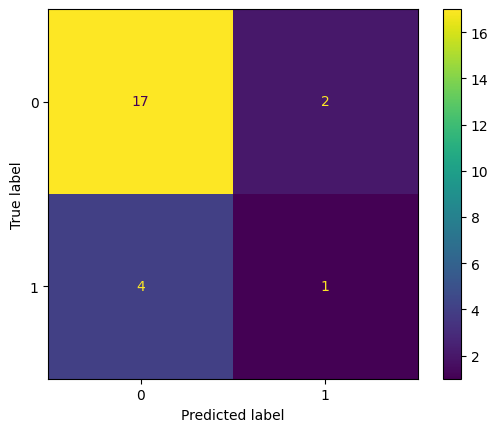

In [46]:
cm = confusion_matrix(couple_of_true_y, couple_of_pred_y, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()